In [51]:
import numpy as np
import scipy
import pandas as pd
from pandas import Series
from matplotlib import pyplot
import math
import random
import sklearn
from sklearn import metrics
import seaborn as sns
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot, autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")

cpu = pd.read_csv('/Users/nathalie.willems/Documents/AAAM/machine_learning/infra_prediction/sap_st06_cpu_EAP_feb_june.csv')
cpu.head(10)

,_time,avg(Value)
0,2018-02-13T00:00:00.000+0000,NaN
1,2018-02-13T01:00:00.000+0000,55.333333
2,2018-02-13T02:00:00.000+0000,50.000000
3,2018-02-13T03:00:00.000+0000,42.333333
4,2018-02-13T04:00:00.000+0000,43.000000
5,2018-02-13T05:00:00.000+0000,40.333333
6,2018-02-13T06:00:00.000+0000,46.500000
7,2018-02-13T07:00:00.000+0000,40.500000
8,2018-02-13T08:00:00.000+0000,38.666667
9,2018-02-13T09:00:00.000+0000,41.333333


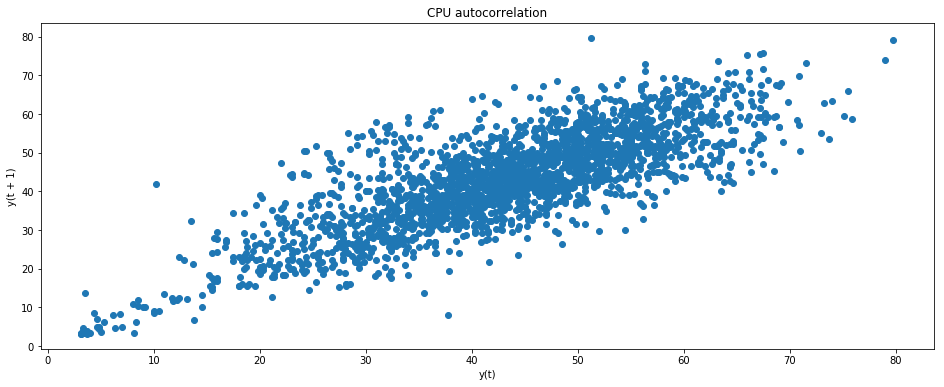

In [52]:
plt.figure(figsize=(16,6))
cpu_graph = lag_plot(cpu['avg(Value)'])
cpu_graph.set_title('CPU autocorrelation')
plt.show()

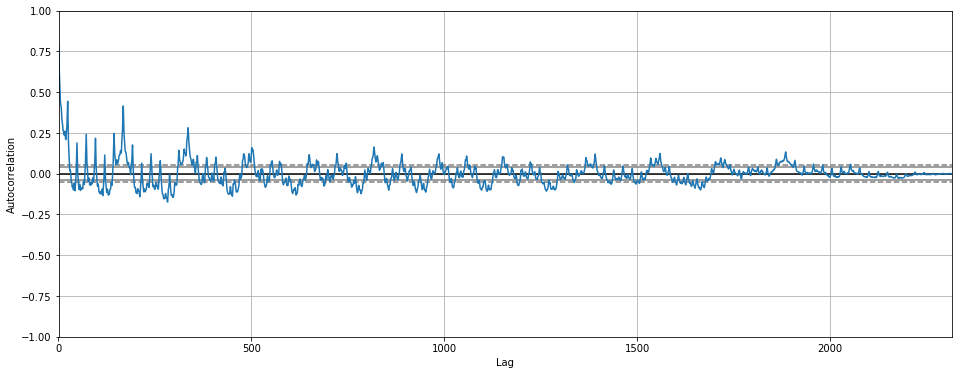

In [53]:
# CPU

plt.figure(figsize=(16,6))
cpu.dropna(inplace=True)
autocorrelation_plot(cpu['avg(Value)'])
plt.show()

### ARIMA Model - CPU 

Model fitting

In [56]:
# split into train and test sets
cpu.dropna(inplace=True)
small = cpu.iloc[0:168, 1]
X = small.values
train, test = X[:len(X)-24], X[len(X)-24:]

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  143
Model:                ARIMA(24, 1, 0)   Log Likelihood                -463.217
Method:                       css-mle   S.D. of innovations              5.687
Date:                Mon, 02 Jul 2018   AIC                            978.435
Time:                        21:25:59   BIC                           1055.469
Sample:                             1   HQIC                          1009.737
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1021      0.068     -1.511      0.134      -0.234       0.030
ar.L1.D.y     -0.2986        nan        nan        nan         nan         nan
ar.L2.D.y     -0.3616      0.069     -5.232      0.0

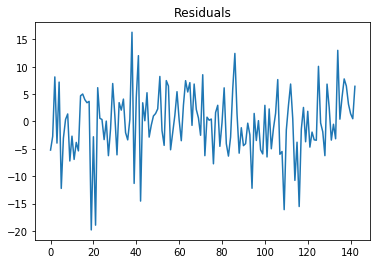

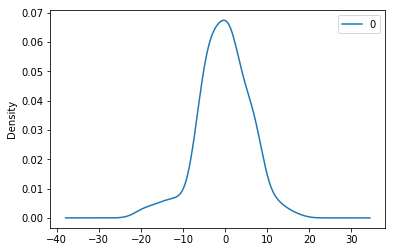

                0
count  143.000000
mean    -0.309135
std      6.037252
min    -19.830379
25%     -3.750992
50%      0.152183
75%      3.426009
max     16.318225


In [57]:
# train autoregression
model = ARIMA(train, order=(24,1,0))
# fit model
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title='Residuals', legend=False)
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

Model Prediction/Forecasting

In [58]:
#small = cpu['avg(Value)'].head(168)
#X = small.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
history[:10]

[55.33333333333334,
 50.0,
 42.333333333333336,
 43.0,
 40.333333333333336,
 46.5,
 40.5,
 38.66666666666666,
 41.333333333333336,
 44.66666666666666]

In [ ]:
# split into 2/3 of data
#size = int(len(small) * 0.66)
#train, test = small[0:size], small[size:len(small)]
#history = [x for x in train]

predictions = []
for i in range(len(test)):
    model = ARIMA(history, order=(24,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print(output)
    yhat = output[0]
    predictions.append(yhat)
    #t = 168 + i
    obs = test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

#test2 = test[len(test):len(test)+10]
    
error = metrics.mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [20]:
print('Test MSE: %.3f' % error)

Test MSE: 65.262


### AR Model - CPU

In [93]:
# split into train and test sets
#cpu.dropna(inplace=True)
#X = small['avg(Value)'].values
#train, test = X[:len(small)-24], X[len(X)-24:]

Lag: 13
Coefficients: [ 7.83846089e+00  8.70574469e-01 -1.04018380e-01 -9.18622028e-04
 -1.43180496e-02 -2.37991375e-02 -7.60340835e-02  2.10071523e-01
 -2.13244642e-02 -1.41430139e-01  5.49722214e-03  1.71971372e-01
 -1.80198502e-01  9.18778954e-02]
predicted=37.269182, expected=34.666667
predicted=37.917438, expected=38.000000
predicted=40.718916, expected=36.166667
predicted=36.131588, expected=32.666667
predicted=35.229379, expected=35.166667
predicted=36.855893, expected=31.833333
predicted=37.317218, expected=23.000000
predicted=37.553192, expected=30.833333
predicted=37.103809, expected=31.166667
predicted=38.689395, expected=28.666667
predicted=38.268021, expected=26.333333
predicted=36.771915, expected=49.833333
predicted=37.019698, expected=36.500000
predicted=37.777954, expected=24.000000
predicted=36.986725, expected=26.500000
predicted=36.902822, expected=45.833333
predicted=37.308130, expected=41.833333
predicted=37.413305, expected=54.333333
predicted=37.012096, expected

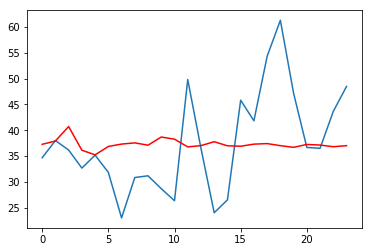

In [21]:
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = metrics.mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Rolling model

predicted=37.269182, expected=34.666667
predicted=35.651755, expected=38.000000
predicted=41.061501, expected=36.166667
predicted=32.162319, expected=32.666667
predicted=32.723611, expected=35.166667
predicted=37.226650, expected=31.833333
predicted=33.215507, expected=23.000000
predicted=25.216442, expected=30.833333
predicted=33.249867, expected=31.166667
predicted=33.979684, expected=28.666667
predicted=29.838740, expected=26.333333
predicted=28.506155, expected=49.833333
predicted=50.869229, expected=36.500000
predicted=32.826035, expected=24.000000
predicted=25.730568, expected=26.500000
predicted=31.154762, expected=45.833333
predicted=44.512324, expected=41.833333
predicted=36.596542, expected=54.333333
predicted=57.126967, expected=61.333333
predicted=57.386909, expected=47.166667
predicted=38.272942, expected=36.666667
predicted=31.931812, expected=36.500000
predicted=42.733092, expected=43.666667
predicted=39.668162, expected=48.500000
Test MSE: 73.076


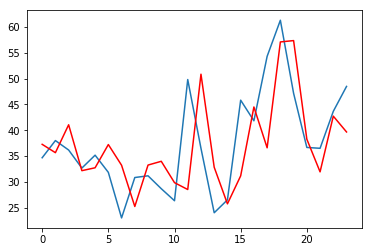

In [22]:
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = metrics.mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()